# Weekly assignment 2

## Read before you start

* Provide clear and complete answers in code blocks or markdown. You may add as many as you need.
* Always motivate your answers. This can be done in markdown cells, or in comments in code.
* Submit your results via Brightspace. Use the following filename convention: ``StudentName1_snumber1_StudentName2_snumber2_Assignment2.ipynb``.
* Make sure you submit a fully executed version of the notebook file. The teaching assistants will not run/debug your code during grading.
* Questions? Ask them during the workgroups, or see Brightspace for instructions on how to proceed.

s1071981 - Adriana Vasileva

s1074780 - Dawid Dudek

## Belief updating

A researcher is doing a study into voting behaviour. They conduct a poll and ask people on the street whether they have voted at the latest elections.

After a day of collecting data, the researcher finds that $z=113$ out of $N=145$ people (claimed to) vote. These data inform the _likelihood_, which is a binomial distribution (Note: the product of Bernoulli's as shown in the lecture is very similar to the binomial distribution. The binomial distribution does not care about the _order_ in which people voted yes/no, which implies the binomial coefficient $\binom{N}{z}$):

$$ p(z\mid N, \theta) = \binom{N}{z} \theta^z (1-\theta)^{N-z} $$

Assume that the researcher started with a completely uniform _prior belief_ over the voting probability $\theta$. They represent this belief with a beta distribution (see the slides from Lecture 2).

1. What settings for $a$ and $b$ are appropriate here?

The researcher can easily update their beliefs about $\theta$, because the beta distribution is __conjugate__ to the binomial likelihood as well! However, that is easy for me to say...

2. Show that the posterior distribution for a beta prior and binomial likelihood is once more a beta distribution. What is the posterior distribution after combining the prior and the likelihood, for the settings of $a$ and $b$ you motivated in question 1, and the observations as given above?

3. Make a plot with $\theta \in [0,1]$ on the horizontal axis. Show the prior $p(\theta\mid a, b)$, with the settings for $a$ and $b$ as you chose in question 1, as well as the posterior $p(\theta\mid a, b, z, N)$ that you determined in question 2. You can use ``scipy.stats.beta.pdf()`` as an easy way to get the beta probability density function.

4. Use the function ``hdi()`` in the code block below to compute the 95% highest posterior density. What is the HDI? Superimpose this interval on your plot using ``plt.axvspan(..., alpha=0.1)``.

1. We should then choose a=b=1. This reflects maximum uncertainty. The PDF of the Beta distribution simplifies to 1, meaning each value for the prior are equally likely.

2. The Binomial likelihood for observing z succesess in N trials, given  θ is: $$p(z|θ,N) = \binom{N}{z} \theta^z (1-\theta)^{N-z} $$

  The Beta distribution (prior) is:


$$ p(\theta) = \frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)} \enspace$$

  The posterior distribution  is:

$$p(θ∣X)∝ p(X∣θ)*p(θ)$$

  Substituting:

$$p(θ∣z)=\binom{N}{z}\theta^z (1-\theta)^{N-z}*\frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)} \enspace $$

We can ignore the binomial and the Beta function since they are consistent with respect to θ.

$$p(θ∣z)∝\theta^{z+a-1}(1-0)^{n-z+b-1}$$

The above expression looks like a Beta distribution where a is updated to be z+a and and b is updated to be n-z+b. The posterior probability is indeead a Beta distribution:

$$ p(θ∣z)= \frac{\theta^{z+a-1}(1-0)^{n-z+b-1}}{B(z+a, n-z+b)}$$


If we chose a=b=1, which represents no prior knowledge, the posteror would look like this:

$$p(θ∣z)= \frac{\theta^{z}(1-0)^{n-z}}{B(z+1, n-z+1)}$$

This is Beta(z+a,n-z+b)

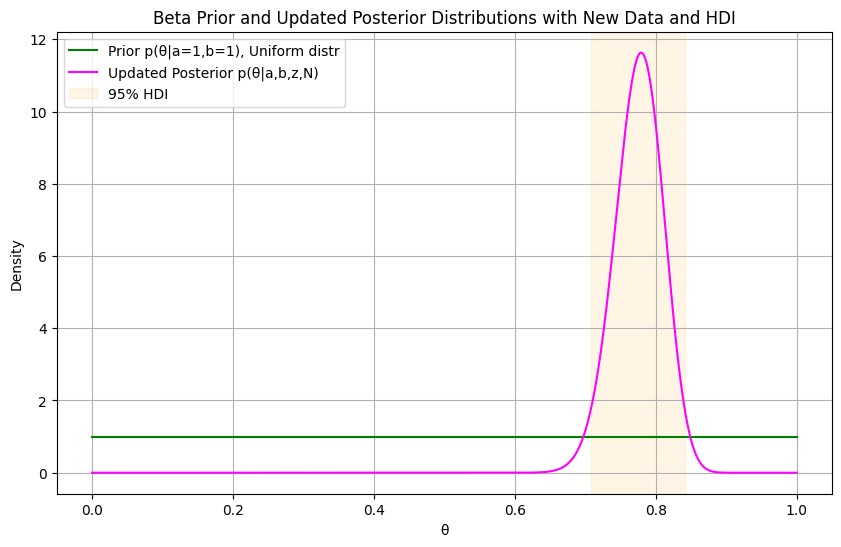

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

#Uniform distribution
a = 1
b = 1

#Observed data:
z = 113
N = 145

#Updated a and b for the updated posterior:
a_update = a + z
b_update = b + N - z

#Theta, so we define values [0:1]:
theta_values = np.linspace(0,1,1000)

prior_pdf = beta.pdf(theta_values, a, b)
posterior_pdf_update = beta.pdf(theta_values, a_update, b_update)

def hdi(theta, pdf, level=0.95):
    sorted_p = np.sort(pdf)[::-1]
    HDI_height = sorted_p[np.cumsum(sorted_p) >= level*sum(sorted_p)][0]
    HDI = theta[pdf >= HDI_height]
    # Return bounds of the HDI:
    return HDI[0], HDI[-1]

hdi_low, hdi_high = hdi(theta_values, posterior_pdf_update)

plt.figure(figsize=(10, 6))
plt.plot(theta_values, prior_pdf, label='Prior p(θ|a=1,b=1), Uniform distr', color='green')
plt.plot(theta_values, posterior_pdf_update, label=f'Updated Posterior p(θ|a,b,z,N)', color='magenta')
plt.axvspan(hdi_low, hdi_high, color='orange', alpha=0.1, label='95% HDI')
plt.title('Beta Prior and Updated Posterior Distributions with New Data and HDI')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


A year later, the researcher repeats the experiment. But rather than starting with a uniform prior belief again, they use the results from the previous experiment as an _informed prior_. This second experiments results in $z_2 = 84, N_2 = 129$.

5. Use the posterior as prior for this new experiment. What is the new posterior when taking your initial prior, the previous experiment, and the current experiment into account?

6. Plot the new posterior on top of your previous figure. What is the new 95% HDI? Is this smaller or wider than the previous one? Why?

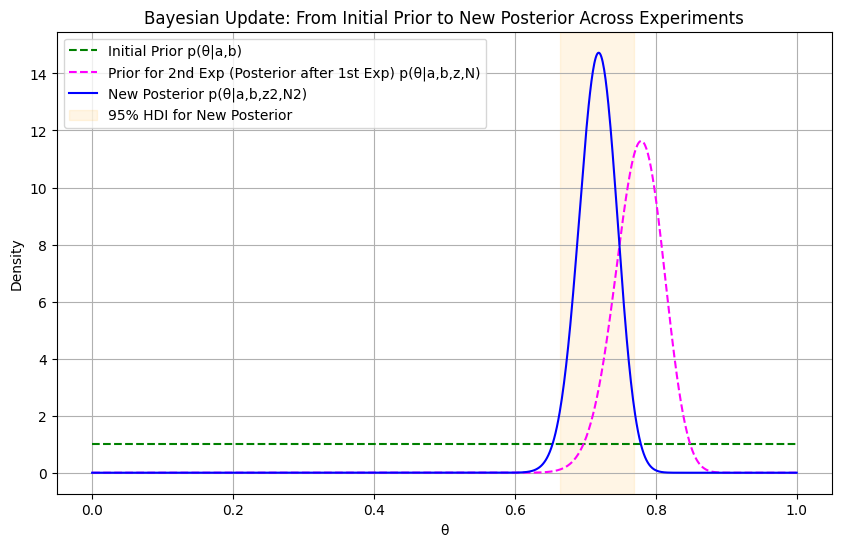

95% HDI for the original posterior: 0.708 to 0.841
95% HDI for the new posterior: 0.665 to 0.770


In [34]:
a_new = a_update
b_new = b_update

prior_pdf_new = beta.pdf(theta_values, a_new, b_new)

z_2 = 84
N_2 = 129

a_posterior_new = a_new + z_2
b_posterior_new = b_new + N_2 - z_2

posterior_pdf_new = beta.pdf(theta_values, a_posterior_new, b_posterior_new)
hdi_low_new, hdi_high_new = hdi(theta_values, posterior_pdf_new)

plt.figure(figsize=(10, 6))
plt.plot(theta_values, prior_pdf, label='Initial Prior p(θ|a,b)', color='green', linestyle='--')
plt.plot(theta_values, prior_pdf_new, label='Prior for 2nd Exp (Posterior after 1st Exp) p(θ|a,b,z,N)', color='magenta', linestyle='--')
plt.plot(theta_values, posterior_pdf_new, label=f'New Posterior p(θ|a,b,z2,N2)', color='blue')
plt.axvspan(hdi_low_new, hdi_high_new, color='orange', alpha=0.1, label='95% HDI for New Posterior')
plt.title('Bayesian Update: From Initial Prior to New Posterior Across Experiments')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

print(f"95% HDI for the original posterior: {hdi_low:.3f} to {hdi_high:.3f}")
print(f"95% HDI for the new posterior: {hdi_low_new:.3f} to {hdi_high_new:.3f}")


## More on conjugacy

Consider once more our favorite theorem:

$$ p(\theta\mid D) = \frac{p(D\mid \theta)p(\theta)}{p(D)} \enspace$$

As we saw in the lecture, if the prior $p(\theta)$ is conjugate to the likelihood $p(D\mid\theta)$, we are in luck: in that case the posterior $p(\theta\mid D)$ has the same form as the prior, just with updated parameters. But that is not all! In the conjugate case, we also have an analytic solution for the _evidence_ (a.k.a. _marginal likelihood_) $P(D)=\int p(D\mid \theta)p(\theta) \text{d}\theta$. That means if we want to do something with $p(D)$, we do not have to use a pesky integral (and later in the course we will see that $p(D)$ has important uses).

Let's assume once more the binomial likelihood:

$$ p(z\mid \theta, N) = \binom{N}{z} \theta^{z} (1-\theta)^{N-z} $$

and the beta prior:

$$ p(\theta \mid a, b) = \frac{\theta^{a-1}(1-\theta)^{b-1})}{B(a,b)} \enspace.$$

Prove that
$$ p(z\mid N, a,b) = \binom{N}{z}\frac{B(z+a, N-z+b)}{B(a,b)} \enspace.$$

Note: if you are using a lot of calculus to get to the result, you are doing it wrong! You only have to expand the expressions for prior and likelihood and look carefully for terms that you recognize / know the solution for.

$$p(z|θ,N) = \binom{N}{z} \theta^z (1-\theta)^{N-z} $$

$$p(\theta|a,b) = \frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)} \enspace$$

$$ p(z\mid \theta, N) = \int_0^1 p(z|\theta,N)*p(\theta|a,b)\, dθ $$

$$ p(z\mid \theta, N) = \int_0^1 \binom{N}{z} \theta^z (1-\theta)^{N-z}*\frac{\theta^{a-1}(1-\theta)^{b-1}}{B(a,b)} \enspace\, dθ $$


$$ p(z\mid \theta, N) = \binom{N}{z} \frac{1}{B(a,b)}\int_0^1  \theta^{z+a-1} (1-\theta)^{N-z+b-1}\, dθ $$

$$ p(z\mid \theta, N) = \binom{N}{z} \frac{B(z+a,N-z+b)}{B(a,b)}  $$

## Conjugacy with other distributions

So far we have looked at the beta distribution, as well as the binomial and product-of-Bernoullis (the latter two being very similar). But of course, conjugacy is not restricted to these distributions -- there are many more examples.

For this exercise, we'll consider the *Poisson distribution*. It describes how often some rare event occurred within a specified time frame (e.g., the number of days of rain in the Sahara dessert, in the span of a year). The Poisson distribution assigns a probability to an observation $k$ (a discrete number) given parameter $\lambda$ (a continuous number, indicating the rate at which these events happen) according to the following probability distribution:

$$ p(k \mid  \lambda) = \mathrm{Poisson}(k\mid \lambda)= \frac{e^{-\lambda} \lambda^k}{k!} \enspace. $$

This is important: $k$ is observed, $\lambda$ is a parameter that we wish to learn, using that data. The parameter tells us for example what the rate of rain in the Sahara is.

1. For this question, let's pick $\lambda=5$. Make a plot of the probability distribution $p(k\mid \lambda=5)$ for $k=0,\ldots, 20$. Remember that $k$ is integer here, so it makes more sense to use ``plt.bar()`` than ``plt.plot()`` as you did for continuous numbers. You can use ``scipy.stats.poisson.pmf`` to easily compute the Poisson probabilities.

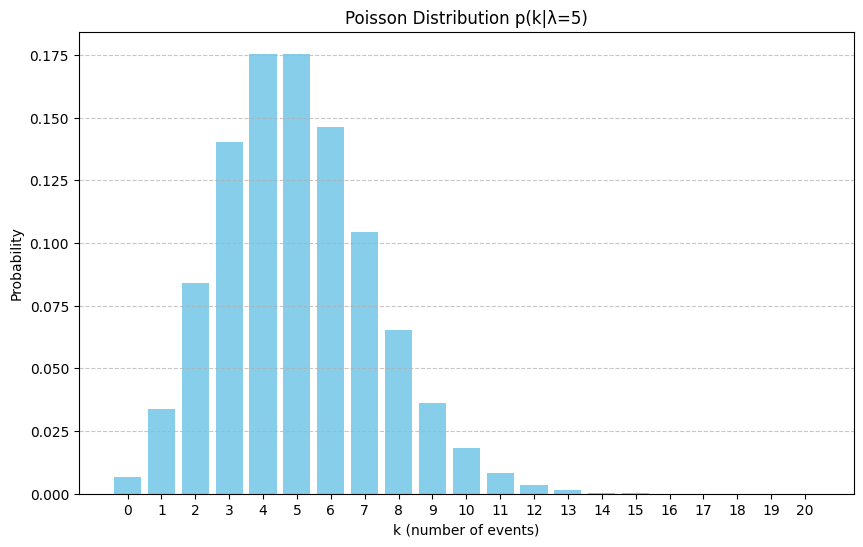

In [35]:
from scipy.stats import poisson

# Parameters
lambda_val = 5
k_values = np.arange(0, 21)  # k from 0 to 20

# Compute Poisson probabilities
probabilities = poisson.pmf(k_values, lambda_val)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilities, color='skyblue')
plt.title('Poisson Distribution p(k|λ=5)')
plt.xlabel('k (number of events)')
plt.ylabel('Probability')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. If you sum the probabilities you computed in the previous question over the different values for $k$, the result is (approximately) 1. Why is this the case?

Of course, there exists a probability distribution that is conjugate to the Poisson distribution. This one is known as the _gamma_ distribution. It has this form:

$$ p(\lambda \mid  \alpha, \beta) = \mathrm{Gamma}(\lambda\mid \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda} \enspace, $$

with two *hyperparameters*, $\alpha$ and $\beta$.

3. Which part of this probability density function is the normalization, i.e. the part that ensures the distribution integrates to 1?

4. Show that indeed the gamma prior is conjugate to the Poisson likelihood. That is, compute the posterior and show that it has exactly the gamma distribution form, but that $\alpha$ and $\beta$ have been updated.

Likelihood:

$$ p(k \mid  \lambda) = \mathrm{Poisson}(k\mid \lambda)= \frac{e^{-\lambda} \lambda^k}{k!} \enspace. $$

Prior:

$$ p(\lambda \mid  \alpha, \beta) = \mathrm{Gamma}(\lambda\mid \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} \lambda^{\alpha-1} e^{-\beta\lambda} \enspace, $$

$$ p(\lambda \mid  \alpha, \beta, k) ∝ p(k \mid  \lambda)*p(\lambda \mid  \alpha, \beta) $$

$$p(\lambda \mid  \alpha, \beta,k)= \frac{e^{-\lambda} \lambda^k}{k!} *\frac{\beta^\alpha}{\Gamma(\alpha)}  \lambda^{\alpha-1} e^{-\beta\lambda} \enspace$$

Removing the terms that dont depend on gamma:

$$p(\lambda \mid  \alpha, \beta,k) ∝ \lambda^{\alpha-1} \lambda^k e^{-\beta\lambda} {e^{-\lambda}}\enspace$$

$$p(\lambda \mid  \alpha, \beta,k) ∝ \lambda^{k+\alpha-1} * e^{-\lambda(β+1)}\enspace$$

$$α' -> α + k$$
$$\beta' -> \beta +1 $$

So the posterior is:

$$ p(\lambda \mid  \alpha', \beta') = \mathrm{Gamma}(\lambda\mid \alpha', \beta) = \frac{\beta^{\alpha'}}{\Gamma(\alpha')} \lambda^{\alpha'-1} e^{-\beta'\lambda} \enspace, $$

$$ p(\lambda \mid  \alpha', \beta') = \mathrm{Gamma}(\lambda\mid \alpha + k, \beta+1) = \frac{\beta^{\alpha + k}}{\Gamma(\alpha + k)} \lambda^{\alpha + k-1} e^{-\beta + 1\lambda} \enspace, $$


Now let's set $\alpha=5$ and $\beta=2$ to determine our prior belief about $\lambda$. Furthermore, assume we observe $k=8$.

5. Make a figure that shows (in three different ``plt.subplots(nrows=1, ncols=3, sharex=True)`` the prior in the left subplot, the likelihood in the middle subplot, and the posterior in the right subplot. All plots should have $\lambda \in [0, 20]$ on the horizontal axis. Since $\lambda$ is a continuous variable, it makes sense to use ``plt.plot()`` again (or ``ax.plot()`` since we are working with subplots, see below). You can use ``scipy.stats.gamma.pdf()`` to compute the gamma probability density function. Note: call the SciPy gamma function as: ``scipy.stats.gamma.pdf(lambda, alpha, scale=1/beta)`` or your results will not make sense!

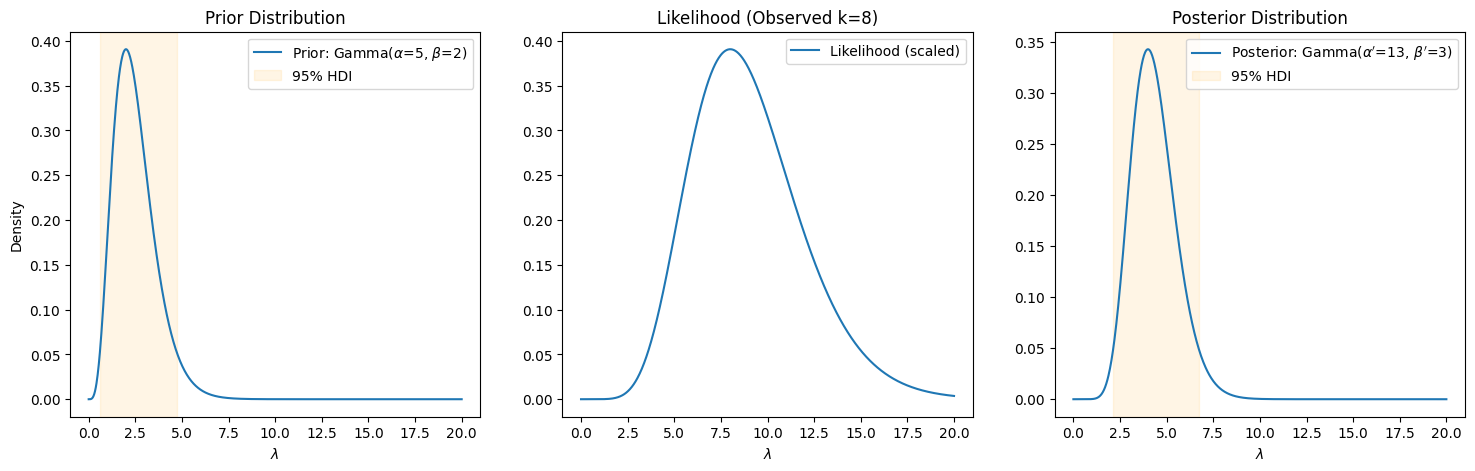

In [36]:
import numpy as np
from scipy.stats import gamma, poisson
import matplotlib.pyplot as plt

# Parameters
alpha, beta, k = 5, 2, 8
lambda_range = np.linspace(0, 20, 1000)

# Prior distribution (Gamma)
prior_pdf = gamma.pdf(lambda_range, a=alpha, scale=1/beta)

# Likelihood (Poisson) - For visualization purposes, not actual PDF
# We use the likelihood function formula and scale it for better comparison
likelihood = np.exp(-lambda_range) * lambda_range**k / np.math.factorial(k)
likelihood_scaled = likelihood / np.max(likelihood) * np.max(prior_pdf)  # Scaled for visualization

# Posterior distribution (Gamma with updated parameters)
alpha_prime = alpha + k  # Update alpha with the number of successes
beta_prime = beta + 1   # Update beta by adding the number of trials (for 1 observation, conceptually)
posterior_pdf = gamma.pdf(lambda_range, a=alpha_prime, scale=1/beta_prime)

hdi_low_2, hdi_high_2 = hdi(lambda_range,prior_pdf)
hdi_low_3, hdi_high_3 = hdi(lambda_range,posterior_pdf)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharex=True)

# Plot prior
axes[0].plot(lambda_range, prior_pdf, label=f'Prior: Gamma($\\alpha$={alpha}, $\\beta$={beta})')
axes[0].axvspan(hdi_low_2, hdi_high_2, color='orange', alpha=0.1, label='95% HDI')
axes[0].set_title('Prior Distribution')
axes[0].set_xlabel('$\\lambda$')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plot likelihood
axes[1].plot(lambda_range, likelihood_scaled, label='Likelihood (scaled)')
axes[1].set_title('Likelihood (Observed k=8)')
axes[1].set_xlabel('$\\lambda$')
axes[1].legend()

# Plot posterior
axes[2].plot(lambda_range, posterior_pdf, label=f'Posterior: Gamma($\\alpha\'$={alpha_prime}, $\\beta\'$={beta_prime})')
axes[2].axvspan(hdi_low_3, hdi_high_3, color='orange', alpha=0.1, label='95% HDI')
axes[2].set_title('Posterior Distribution')
axes[2].set_xlabel('$\\lambda$')
axes[2].legend()

plt.show()

6. Compute the 95% HDI of $\lambda$ for the prior and for the posterior and superimpose it on the corresponding plots using ``ax.axvspan()``. How has it changed?


7. Why does the likelihood in the middle plot __not__ integrate to 1?

In [37]:
print(f"95% HDI for the original posterior: {hdi_low_2:.3f} to {hdi_high_2:.3f}")
print(f"95% HDI for the new posterior: {hdi_low_3:.3f} to {hdi_high_3:.3f}")

95% HDI for the original posterior: 0.621 to 4.725
95% HDI for the new posterior: 2.142 to 6.727
